In [1]:
%reload_ext autoreload

In [2]:
%autoreload 2
%matplotlib inline

import itertools
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

## Make analysis graphs for consistency/independence/robustness

In [36]:
def get_top_sequence_per_batch(data):
    top_per_batch=[]
    for i in data.batch.unique():
        sub_data=data[data.batch==i] #must also group by model type and landscape id
        #print (sub_data.true_score.max())
        top_per_batch.append(sub_data.true_score.max())
    return (top_per_batch)

def compute_cumulative_outcomes(data): 
    outcomes=pd.DataFrame(columns=["landscape_id","start_id","model_type","explorer_type",
                                   "batch","max_fitness","cum_max_fitness"])
    for landscape in data.landscape_id.unique():
        if landscape==str(-1): #or start_id==str(-1):
            continue
        print(landscape)
        valid_start_ids=[x for x in data.start_id.unique()]# if landscape[landscape.index("L"): landscape.index("R")] in x]
        for start_id in valid_start_ids:
            for explorer_type in data.explorer_type.unique():
                sub_data = data[(data.landscape_id==landscape)&\
                               (data.start_id==start_id)&\
                               (data.explorer_type==explorer_type)] 
                cum_fit=0
                for batch, max_fitness in enumerate(get_top_sequence_per_batch(sub_data)):
                    if max_fitness>cum_fit:
                       cum_fit = max_fitness 
                    outcomes = outcomes.append(pd.DataFrame.from_records([{"landscape_id":landscape,\
                                          "start_id":start_id,\
                                          "explorer_type": explorer_type,\
                                          "batch": batch+1, \
                                          "max_fitness": max_fitness,\
                                          "cum_max_fitness": cum_fit}])) 
                    
    return outcomes

SIX6_REF_R1


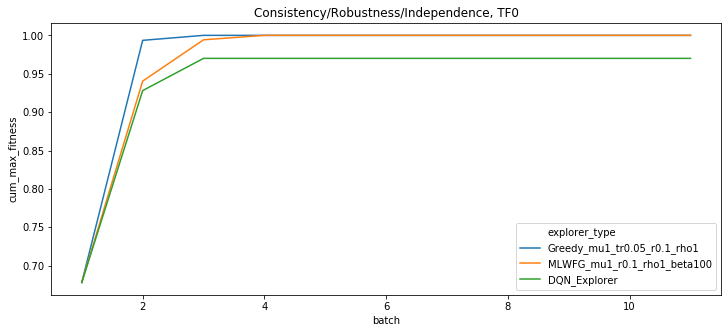

In [49]:
data1=pd.read_csv("../simulations/evaluations_test_six6/consistency_robustness_independence/Greedy_mu1_tr0.05_r0.1_rho1.csv",index_col=False)
data2=pd.read_csv("../simulations/evaluations_test_six6/consistency_robustness_independence/MLWFG_mu1_r0.1_rho1_beta100.csv",index_col=False)
data3 = pd.read_csv("../simulations/eval/consistency_robustness_independence/DQN_Explorer.csv")
data3 = data3[(data3['landscape_id'] == 'SIX6_REF_R1')]
data = data1.append(data2).append(data3)
sub_data=data[(data.model_type=="NAMb_ss0.9") & (data.start_id == 'TF0')]
outcomes = compute_cumulative_outcomes(sub_data)
plt.figure(figsize=(12,5))
plt.title('Consistency/Robustness/Independence, TF0')
sns.lineplot(x="batch",y="cum_max_fitness",hue="explorer_type",data= outcomes, color="r")

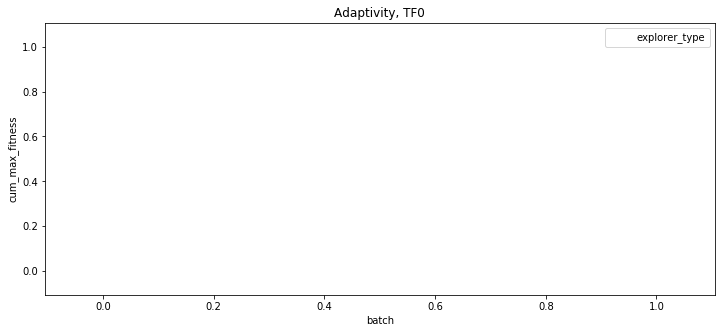

In [56]:
data1=pd.read_csv("../simulations/eval/adaptivity/CMAES.csv", index_col=False)
data2=pd.read_csv("../simulations/eval/adaptivity/DQN_Explorer.csv", index_col=False)
data3 = pd.read_csv("../simulations/eval/adaptivity/DynaPPO_Agent_0.5_5_10.csv", index_col=False)
data4 = pd.read_csv("../simulations/eval/adaptivity/PPO_Agent.csv", index_col=False)
data = data1.append(data2).append(data3).append(data4)
sub_data=data[(data.model_type=="NAMb_ss0.9") & (data.start_id == 'TF0') & (data['landscape_id'] == 'SIX6_REF_R1')]
outcomes = compute_cumulative_outcomes(sub_data)
plt.figure(figsize=(12,5))
plt.title('Adaptivity, TF0')
sns.lineplot(x="batch",y="cum_max_fitness",hue="explorer_type",data= outcomes, color="r")

SIX6_REF_R1


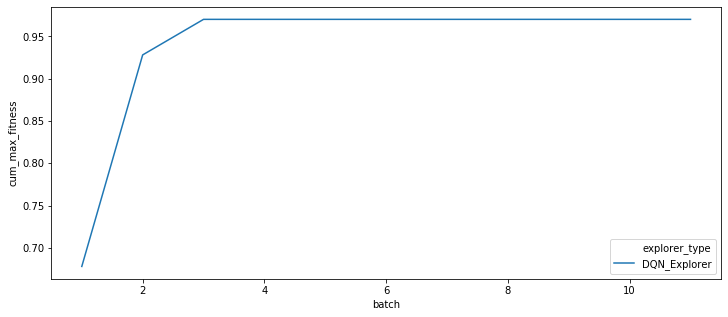

In [38]:
data3 = pd.read_csv("../simulations/eval/consistency_robustness_independence/DQN_Explorer.csv")
data3 = data3[(data3['start_id'] == 'TF0') & (data3['landscape_id'] == 'SIX6_REF_R1') & 
              (data3['model_type'] == 'NAMb_ss0.9')]
outcomes3 = compute_cumulative_outcomes(data3)
plt.figure(figsize=(12,5))
sns.lineplot(x="batch",y="cum_max_fitness",hue="explorer_type",data=outcomes3, color="r")

## Run analysis graphs for other simulation types 

In [ ]:
# TBD 